**Exploratory Data Analysis on a Ultra Marathon Dataset (1798 - 2019)**

In [1]:
#import Libraries
import warnings

warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
#loading the file as a dataframe
df = pd.read_csv('/content/TWO_CENTURIES_OF_UM_RACES.csv')

In [150]:
#sample top 5 row of data
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [49]:
#Number of rows and columns
df.shape

(7461195, 13)

In [50]:
#Datatypes of the columns
df.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete club,object
Athlete country,object
Athlete year of birth,float64
Athlete gender,object


# **CLEANING THE DATA**

<Axes: title={'center': 'No of Events in each country'}, xlabel='Country', ylabel='Count'>

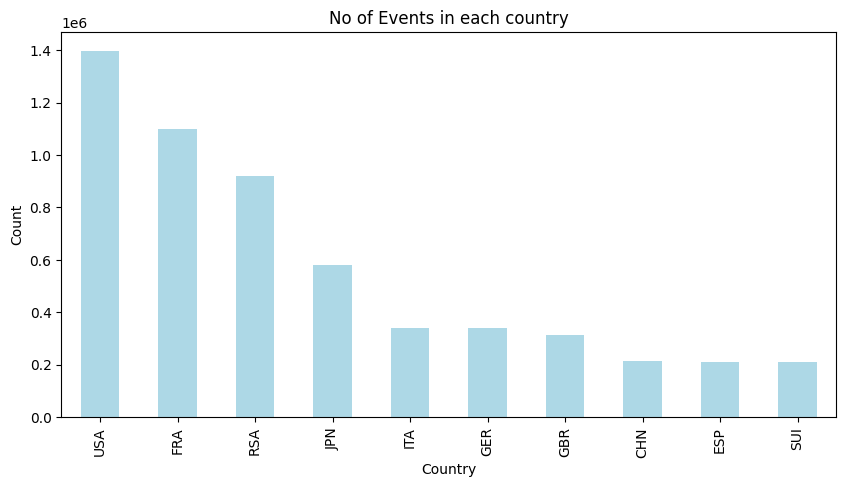

In [51]:
#no of countrys event:
df['Event name'].str.split('(').str.get(1).str.split(')').str.get(0).value_counts().head(10).plot(kind='bar',title='No of Events in each country',ylabel='Count',xlabel='Country',color='lightblue',figsize=(10,5))

In [52]:
#cleaning up the data
#Filtering data to only include USA 2019 races to conduct further exploratory data analysis
#Step1: filtering only top 4 Event distance/length by count as the standard race distance
#Further filtering USA events from the Event Name column by extracting the country name from the Event name column
USA_races = df['Event name'].str.extract(r'\((.*?)\)', expand=False) == 'USA'
final_df = df[(df['Event distance/length'].isin(['100km','50km','100mi','50mi'])) & (df['Year of event'] == 2019)&(USA_races)]

In [53]:
final_df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1806216,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,4:43:04 h,"*Stuarts Draft, VA",USA,1976.0,M,M40,10.598,145423
1806217,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:04:11 h,"*Winston Salem, NC",JPN,1968.0,M,M50,9.862,23412
1806218,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:23:03 h,"*Greenville, SC",USA,1964.0,M,M50,9.286,3886
1806219,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:28:37 h,"*Elizabethton, TN",USA,1969.0,F,W50,9.129,141
1806220,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:48:59 h,"*Roan Mountain, TN",USA,1989.0,M,M23,8.596,23417
1806221,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,5:55:45 h,"*Gastonia, NC",USA,1976.0,M,M40,8.433,67680
1806222,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,6:02:07 h,"*Pinnacle, NC",USA,1976.0,F,W40,8.285,68013
1806223,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,6:02:38 h,"*Gastonia, NC",USA,1974.0,M,M40,8.273,228589
1806224,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,6:12:12 h,"*Thomasville, NC",USA,1984.0,M,M23,8.06,72932
1806225,2019,09.03.2019,Wicked Root 50k - Saturday Run (USA),50km,32,6:34:23 h,"*Wake Forest, NC",USA,1972.0,M,M45,7.607,23424


In [54]:
#Final data shape
final_df.shape

(89064, 13)

In [55]:
#Removing (USA) from Event name
final_df['Event name'] = final_df['Event name'].str.split('(').str.get(0)
final_df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
1806216,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,4:43:04 h,"*Stuarts Draft, VA",USA,1976.0,M,M40,10.598,145423
1806217,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:04:11 h,"*Winston Salem, NC",JPN,1968.0,M,M50,9.862,23412
1806218,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:23:03 h,"*Greenville, SC",USA,1964.0,M,M50,9.286,3886
1806219,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:28:37 h,"*Elizabethton, TN",USA,1969.0,F,W50,9.129,141
1806220,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:48:59 h,"*Roan Mountain, TN",USA,1989.0,M,M23,8.596,23417


In [56]:
#Extracting the age of the Athlete from the data by subtracting the Year of Event with the Athlete year of birth
final_df['Athlete_Age'] = 2019 - final_df['Athlete year of birth']
final_df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
1806216,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,4:43:04 h,"*Stuarts Draft, VA",USA,1976.0,M,M40,10.598,145423,43.0
1806217,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:04:11 h,"*Winston Salem, NC",JPN,1968.0,M,M50,9.862,23412,51.0
1806218,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:23:03 h,"*Greenville, SC",USA,1964.0,M,M50,9.286,3886,55.0
1806219,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:28:37 h,"*Elizabethton, TN",USA,1969.0,F,W50,9.129,141,50.0
1806220,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:48:59 h,"*Roan Mountain, TN",USA,1989.0,M,M23,8.596,23417,30.0


In [57]:
#removing 'h from the athlete performance
final_df['Athlete performance'] = final_df['Athlete performance'].str.split(' ').str.get(0)
final_df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
1806216,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,4:43:04,"*Stuarts Draft, VA",USA,1976.0,M,M40,10.598,145423,43.0
1806217,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:04:11,"*Winston Salem, NC",JPN,1968.0,M,M50,9.862,23412,51.0
1806218,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:23:03,"*Greenville, SC",USA,1964.0,M,M50,9.286,3886,55.0
1806219,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:28:37,"*Elizabethton, TN",USA,1969.0,F,W50,9.129,141,50.0
1806220,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:48:59,"*Roan Mountain, TN",USA,1989.0,M,M23,8.596,23417,30.0


In [58]:
#Dropping columns : Athlete Club, Athlete year of birth
final_df = final_df.drop(['Athlete club','Athlete year of birth'],axis=1)


In [59]:
final_df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
1806216,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,4:43:04,USA,M,M40,10.598,145423,43.0
1806217,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:04:11,JPN,M,M50,9.862,23412,51.0
1806218,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:23:03,USA,M,M50,9.286,3886,55.0
1806219,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:28:37,USA,F,W50,9.129,141,50.0
1806220,2019,09.03.2019,Wicked Root 50k - Saturday Run,50km,32,5:48:59,USA,M,M23,8.596,23417,30.0


In [60]:
# Clear NaN values
final_df.isna().sum()

,0
Year of event,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete country,0
Athlete gender,0
Athlete age category,841
Athlete average speed,0


In [61]:
final_df = final_df.dropna()

In [62]:
#Checking Duplicates
final_df[final_df.duplicated()==True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age


In [63]:
#Reset Index
final_df = final_df.reset_index(drop=True)

In [64]:
final_df.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete country,object
Athlete gender,object
Athlete age category,object
Athlete average speed,object


In [65]:
#fixing data types
final_df['Athlete_Age'] = final_df['Athlete_Age'].astype('int')


In [66]:
final_df['Athlete average speed'] = final_df['Athlete average speed'].astype(str)
final_df = final_df[~final_df['Athlete average speed'].str.match(r'^\d{2}:\d{2}:\d{2}$')]

In [67]:
final_df['Athlete average speed'] = final_df['Athlete average speed'].astype('float')

In [68]:
final_df.dtypes

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,int64
Athlete performance,object
Athlete country,object
Athlete gender,object
Athlete age category,object
Athlete average speed,float64


In [143]:
final_df.describe()

,Year of event,Event dates,Event number of finishers,Athlete performance,Athlete average speed,Athlete ID,Athlete_Age
count,88138.0,72735,88138.000000,88138,88138.000000,88138.000000,88138.000000
mean,2019.0,2019-06-29 11:10:57.042689280,171.274967,0 days 10:51:28.134958814,7.147312,339933.405886,41.471601
min,2019.0,2019-01-01 00:00:00,1.000000,0 days 02:50:02,0.833000,55.000000,8.000000
25%,2019.0,2019-04-07 00:00:00,57.000000,0 days 06:32:32.250000,5.998000,73527.000000,34.000000
50%,2019.0,2019-06-15 00:00:00,114.000000,0 days 08:11:29,6.938000,260908.000000,41.000000
75%,2019.0,2019-10-05 00:00:00,208.000000,0 days 12:15:02,8.085000,654785.750000,49.000000
max,2019.0,2019-12-31 00:00:00,1329.000000,5 days 00:00:00,17.644000,810055.000000,99.000000
std,0.0,NaN,200.123684,0 days 06:56:18.465115720,1.640595,277431.296950,10.407734


# **VISUALIZING THE DATA**

**Athletes in Top 4 race category by gender**

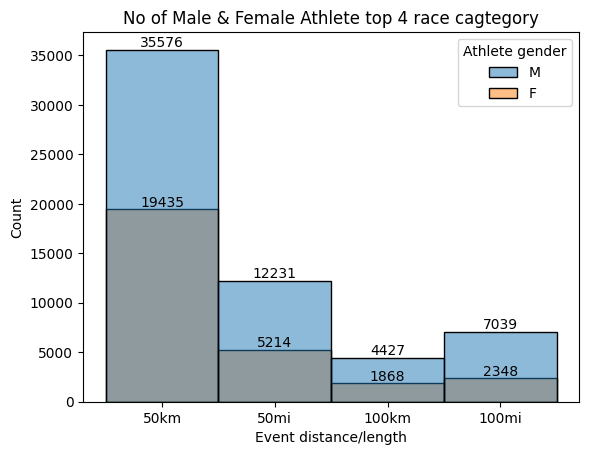

In [70]:
#No of Male & Female Athlete in the 50km & 50 mi race cagtegory
sns.histplot(final_df,x = 'Event distance/length',hue='Athlete gender')

# Annotate the bars with values (count of events)
ax = plt.gca()  # Get the current axis

# Loop through each patch (bar) in the plot
for p in ax.patches:
    # Get the height of the bar (i.e., the count)
    height = p.get_height()

    # If the height is greater than 0, add a label with the height value
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5), textcoords='offset points')

# Show the plot
ax.set_title("No of Male & Female Athlete top 4 race cagtegory")
plt.show()

**Athletes in Top(5) events by count**

<Axes: title={'center': 'Number of Athlete in top(5) event'}, xlabel='Event Name', ylabel='Count of Athletes '>

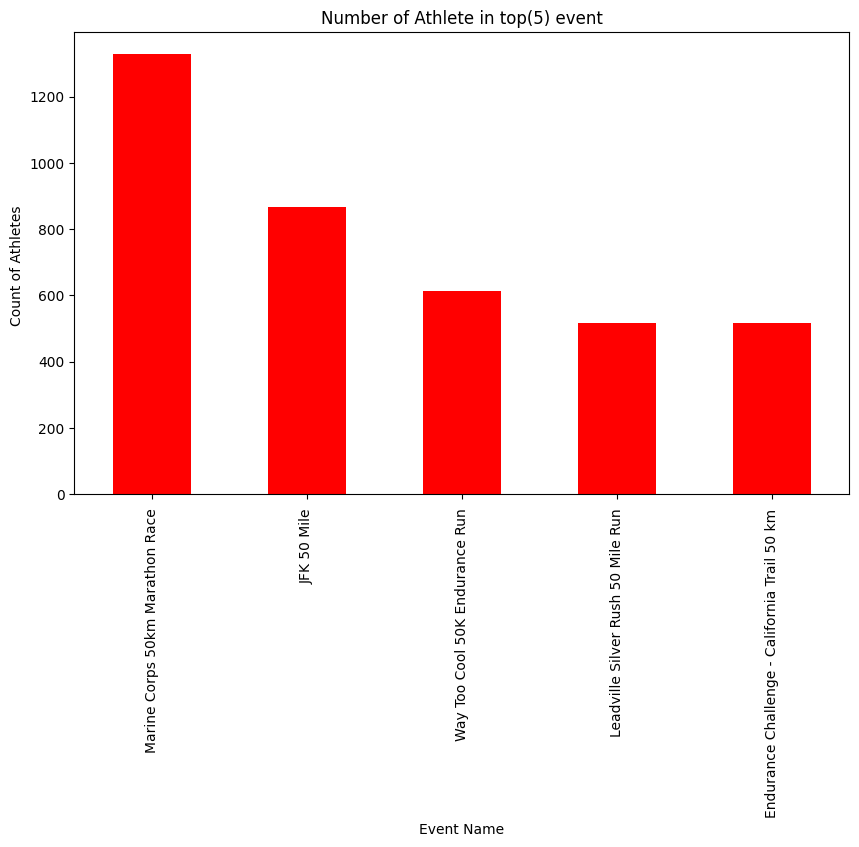

In [71]:
 # No fo Athlete participated in each event top(5) by count
final_df['Event name'].value_counts().head().plot(kind='bar',title='Number of Athlete in top(5) event',xlabel='Event Name',ylabel='Count of Athletes ',\
figsize=(10,6),color='red')


**Athlete Age Distribution**




Text(0.5, 1.0, 'Distribution of Athlete age')

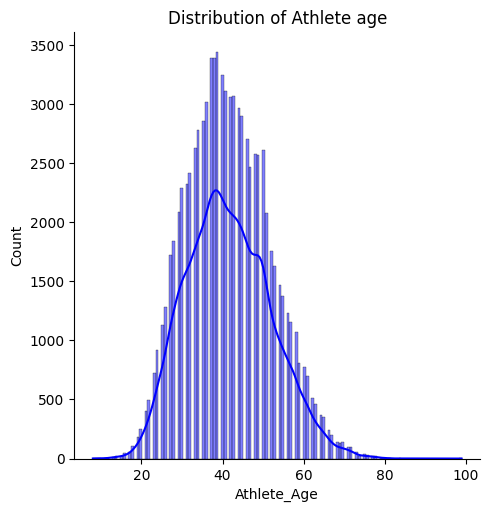

In [72]:
#Distribution of Athlete Age
sns.displot(data=final_df,x='Athlete_Age',kind='hist',color='blue',kde='True')
plt.title("Distribution of Athlete age")

In [73]:
final_df.columns


Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete country',
       'Athlete gender', 'Athlete age category', 'Athlete average speed',
       'Athlete ID', 'Athlete_Age'],
      dtype='object')

**Athlete Speed Distribution**

Text(0.5, 1.0, 'Distributions of Athlete average speed')

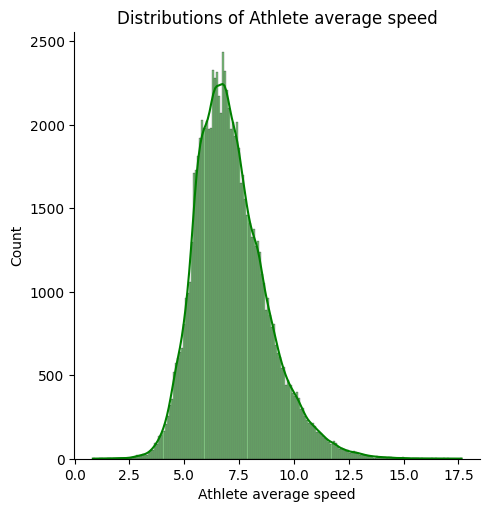

In [74]:
#Distribution of Athlete Average Speed -
sns.displot(data=final_df,x='Athlete average speed',kind='hist',color='green',kde='True')
plt.title("Distributions of Athlete average speed")

**Age vs Average Speed**

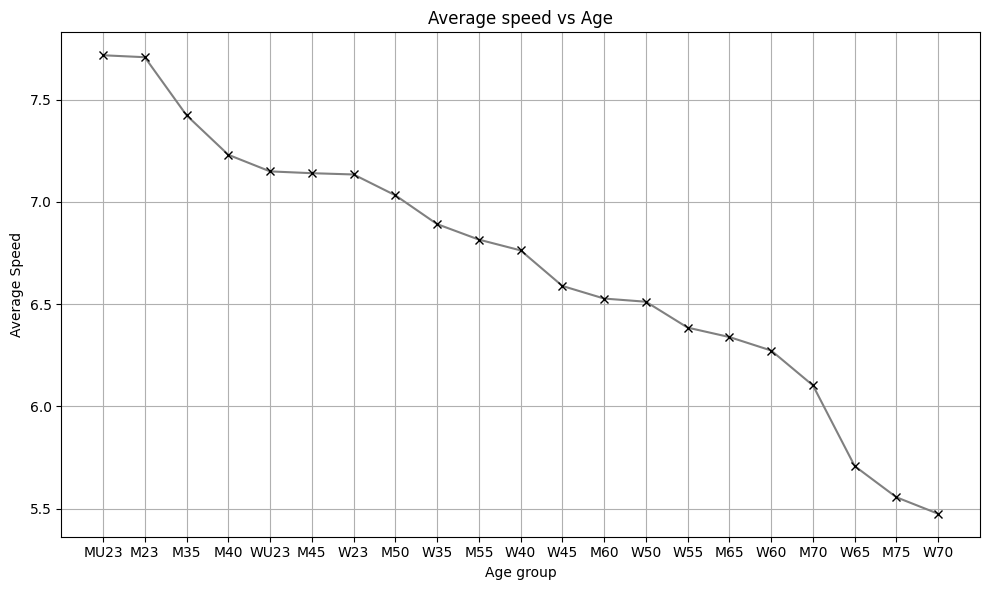

In [75]:
#Age vs Average Speed
Age_vs_Speed  = final_df.groupby(['Athlete age category'])['Athlete average speed'].agg(['mean','count']).sort_values(by='mean',ascending=False).query('count>20')
plt.figure(figsize=(10,6))
plt.plot(Age_vs_Speed.index,Age_vs_Speed['mean'],marker='x',color='grey',mec ='black')
plt.xlabel('Age group')
plt.ylabel('Average Speed')
plt.title('Average speed vs Age')
plt.grid(True)
plt.tight_layout()
plt.show()

**Athlete Average Speed by Event Distance and Gender**

In [76]:
#Athlete average speed by Event Distance and Gender
distance_gender = final_df.groupby(['Event distance/length','Athlete gender'])['Athlete average speed'].agg(['mean','count'])\
.sort_values(by='mean',ascending=False)
distance_gender

mean  count
Event distance/length Athlete gender                 
50km                  M               7.656022  35576
50mi                  M               7.261080  12231
50km                  F               6.989654  19435
50mi                  F               6.819738   5214
100km                 M               6.699293   4427
                      F               6.255761   1868
100mi                 M               6.025974   7039
                      F               5.794924   2348

Text(0, 0.5, 'Athlete average speed')

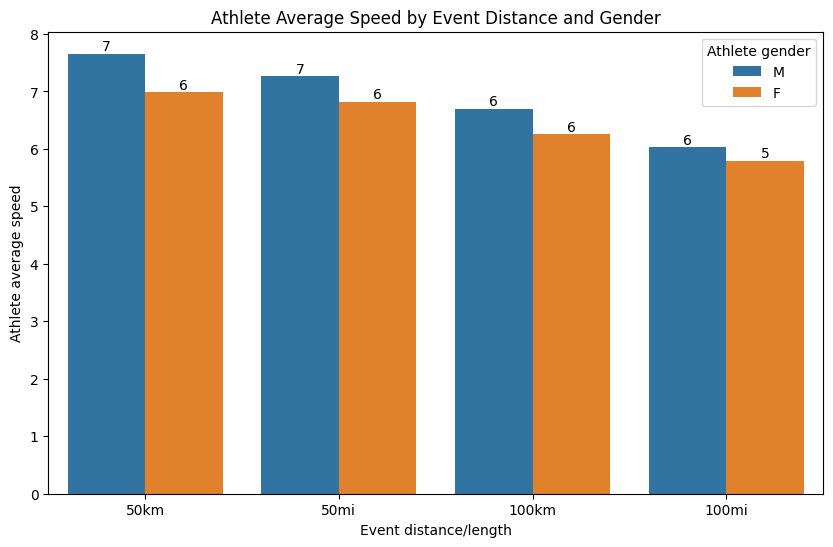

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x='Event distance/length',y='mean',hue='Athlete gender',data=distance_gender)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()

    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width()/2.,height),
                    ha='center',va='center',
                    fontsize=10,color='black',
                    xytext=(0,5),textcoords = ('offset points'))

plt.title('Athlete Average Speed by Event Distance and Gender')
plt.xlabel('Event distance/length')
plt.ylabel('Athlete average speed')

In [78]:
final_df['Event dates']=pd.to_datetime(final_df['Event dates'],format='%d.%m.%Y',errors='coerce')
final_df['Athlete performance']=pd.to_timedelta(final_df['Athlete performance'],errors='coerce')

In [79]:
filtered_df = final_df[(final_df['Event distance/length'].isin(['100km','50km','100mi','50mi']))]
filtered_df['Performance_hours'] = filtered_df['Athlete performance'].dt.total_seconds() / 3600

# Group by Event distance/length to compute IQR
def lower_bound_outliers(group):
    Q1 = group['Performance_hours'].quantile(0.25)
    Q3 = group['Performance_hours'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return group[group['Performance_hours'] < lower_bound]

outliers = filtered_df.groupby('Event distance/length',group_keys=False).apply(lower_bound_outliers)
# Display the outliers (fastest athletes)
outliers = outliers.sort_values(by=['Event distance/length','Performance_hours'])
# Group by 'Event distance/length' and get the top 5 fastest athletes for each event
top_5 = outliers.groupby('Event distance/length').apply(lambda x: x.nsmallest(5, 'Performance_hours')).reset_index(drop=True)

# Display the top 5 fastest athletes
print(top_5[['Event distance/length', 'Athlete ID', 'Performance_hours']])

# fastest_athletes = top_5.pivot_table(index='Athlete ID',columns='Event distance/length',values='Performance_hours',aggfunc='first')
# fastest_athletes

   Event distance/length  Athlete ID  Performance_hours
0                  100km      253638           6.331667
1                  100km      229487           6.563889
2                  100km       12696           6.652500
3                  100km      253640           6.867500
4                  100km      535021           6.909167
5                  100mi       12696          11.320278
6                  100mi      229487          12.361944
7                  100mi      229487          12.362222
8                  100mi        1119          12.598056
9                  100mi      367298          12.995278
10                  50km      128054           2.833889
11                  50km      648230           2.848611
12                  50km      648231           2.859444
13                  50km      674196           2.871944
14                  50km      283496           2.914167
15                  50mi      117534           4.835556
16                  50mi      253638           4

Text(0, 0.5, 'Athlete Performance in hours')

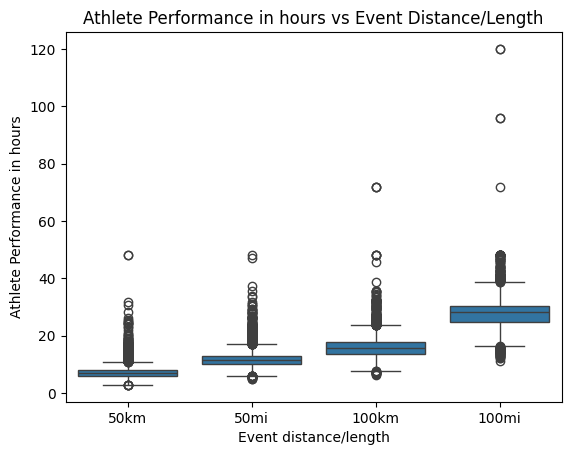

In [81]:
sns.boxplot(y=filtered_df['Athlete performance'].dt.total_seconds() / 3600,x=filtered_df['Event distance/length'])
plt.title('Athlete Performance in hours vs Event Distance/Length')
plt.xlabel('Event distance/length')
plt.ylabel('Athlete Performance in hours')

In [84]:
filtered_df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age,Performance_hours
0,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 04:43:04,USA,M,M40,10.598,145423,43,4.717778
1,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:04:11,JPN,M,M50,9.862,23412,51,5.069722
2,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:23:03,USA,M,M50,9.286,3886,55,5.384167
3,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:28:37,USA,F,W50,9.129,141,50,5.476944
4,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:48:59,USA,M,M23,8.596,23417,30,5.816389


In [86]:
#Each event and their mean, max and min time taken by althetes
Event_by_hours = filtered_df.groupby('Event name')['Performance_hours'].agg(['mean','count','min','max']).query('count>20')
Event_by_hours

,mean,count,min,max
Event name,,,,
AZT Oracle Rumble 50 Km,7.294040,77,4.651667,10.100556
AZT Oracle Rumble 50 Mile,12.062857,28,7.738611,14.308611
"Across the Years, 24h - 100km Split",15.500387,66,9.271111,23.919444
"Across the Years, 24h - 100mi Split",21.378478,23,16.552500,23.892778
"Across the Years, 24h - 50mi Split",13.190915,106,5.955000,23.969722
...,...,...,...,...
Yankee Springs Fall Trail Run Festival,6.245336,24,4.228611,7.838333
Yeti Snakebite 50 km,7.638108,159,3.970556,10.689722
Youngstown Ultra Trail Classic 50K,6.620410,42,4.737778,8.840556


**Event name that has most performance time in hours**

In [87]:
most_performance_time = Event_by_hours.sort_values(by=['mean'],ascending=False)
most_performance_time

,mean,count,min,max
Event name,,,,
"Across the Years, 6 days - 100mi Split",50.863436,27,20.957222,120.000000
INFINITUS 2019 - 100 Mile Ultramarathon,36.903822,29,26.850000,47.595556
Potawatomi 100 Mile Trail Run,35.608729,33,19.716667,48.000000
Blood Rock 100 Mile Endurance Race,34.035063,22,19.621389,43.710556
Grandmaster Ultras 100 Mile Run,33.481257,21,17.709444,46.502778
...,...,...,...,...
Caumsett Park 50K Lloyd Neck - Open Race,5.221978,49,3.070000,6.986111
Fat Ass Race - GAC FA50,4.937121,22,3.816667,7.733333
Mad City 50K Road Race,4.835546,30,2.859444,8.760000


**Top 5 Event name that has most performance time in hours**

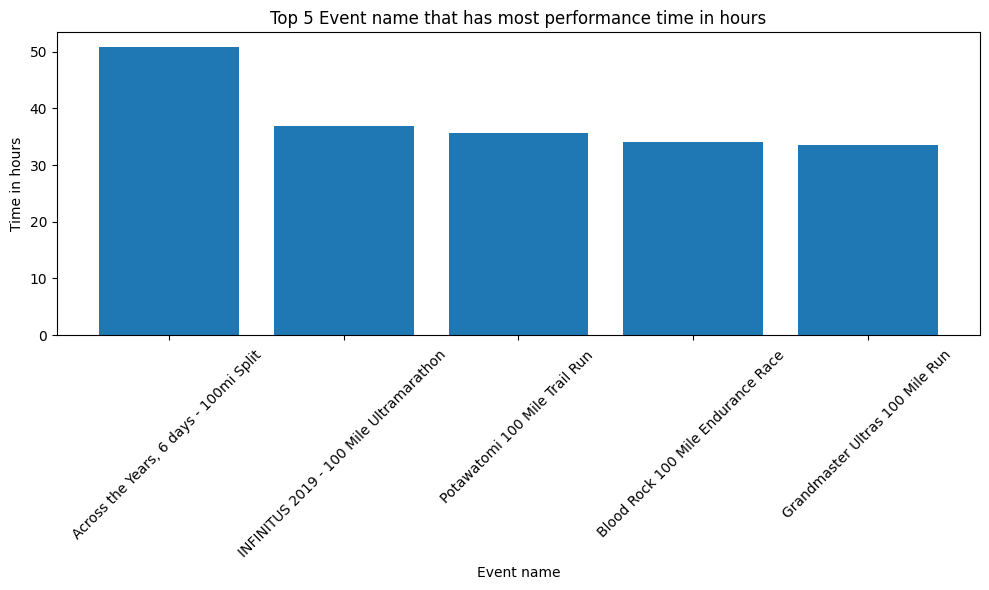

In [90]:
plt.figure(figsize=(10,6))
plt.bar(most_performance_time.head().index,most_performance_time.head()['mean'])
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event name that has most performance time in hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 Event name that has best performance time in hours**

In [91]:
best_performance_time = Event_by_hours.sort_values(by=['mean'])
best_performance_time

,mean,count,min,max
Event name,,,,
Caumsett Park 50K Lloyd Neck - Championships,4.517935,46,2.833889,7.606111
Iron Mines 50k Race,4.663713,68,2.927222,6.542222
Mad City 50K Road Race,4.835546,30,2.859444,8.760000
Fat Ass Race - GAC FA50,4.937121,22,3.816667,7.733333
Caumsett Park 50K Lloyd Neck - Open Race,5.221978,49,3.070000,6.986111
...,...,...,...,...
Grandmaster Ultras 100 Mile Run,33.481257,21,17.709444,46.502778
Blood Rock 100 Mile Endurance Race,34.035063,22,19.621389,43.710556
Potawatomi 100 Mile Trail Run,35.608729,33,19.716667,48.000000


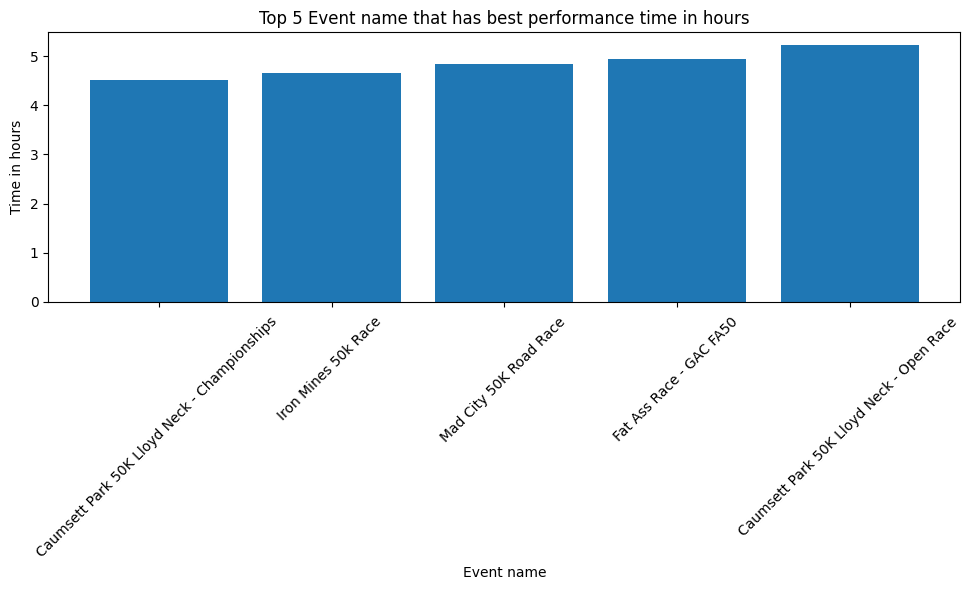

In [95]:
plt.figure(figsize=(10,6))
plt.bar(best_performance_time.head().index,best_performance_time.head()['mean'])
plt.title('Top 5 Event name that has best performance time in hours')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 Event name with Fastest Finish**

In [96]:
fastest_finish = Event_by_hours.sort_values(by=['min'])
fastest_finish

,mean,count,min,max
Event name,,,,
Caumsett Park 50K Lloyd Neck - Championships,4.517935,46,2.833889,7.606111
Mad City 50K Road Race,4.835546,30,2.859444,8.760000
Iron Mines 50k Race,4.663713,68,2.927222,6.542222
Brazos Bend 50 - 50 Km,6.861921,190,2.983611,11.093611
Peyton's Wild and Wacky 10x5Km Ultra,5.672305,74,3.032500,8.435278
...,...,...,...,...
Hawk Hundred - 100 Mile Trail Run,29.600688,21,23.102222,31.948889
Midstate Massive 100 Mile Ultra Trail,28.380444,30,23.450833,32.226389
Plain 100 Mile Endurance Run,31.564286,21,23.666667,35.233333


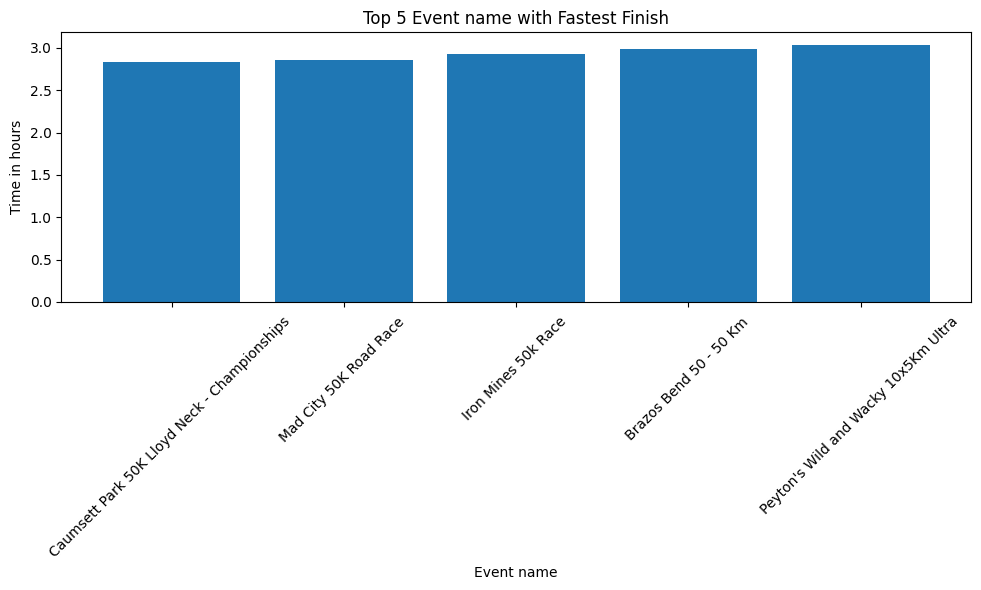

In [99]:
plt.figure(figsize=(10,6))
plt.bar(fastest_finish.head().index,fastest_finish.head()['min'])
plt.title('Top 5 Event name with Fastest Finish')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top 5 Event name with Slowest Finish**

In [98]:
slowest_finish = Event_by_hours.sort_values(by=['max'],ascending=False)
slowest_finish

,mean,count,min,max
Event name,,,,
"Across the Years, 6 days - 100mi Split",50.863436,27,20.957222,120.000000
"Across the Years, 6 days - 100km Split",32.169981,29,11.679167,72.000000
Born to Run Ultra 100 Mile Marathon,33.370607,70,19.800556,48.000000
Potawatomi 100 Mile Trail Run,35.608729,33,19.716667,48.000000
Tesla Hertz Run 50 Km,9.641326,31,4.228056,48.000000
...,...,...,...,...
Chicago Lakefront Fall 50K,5.814513,85,3.849722,6.993056
Caumsett Park 50K Lloyd Neck - Open Race,5.221978,49,3.070000,6.986111
Tacoma City Ultra Marathon,5.331204,24,3.508889,6.649722


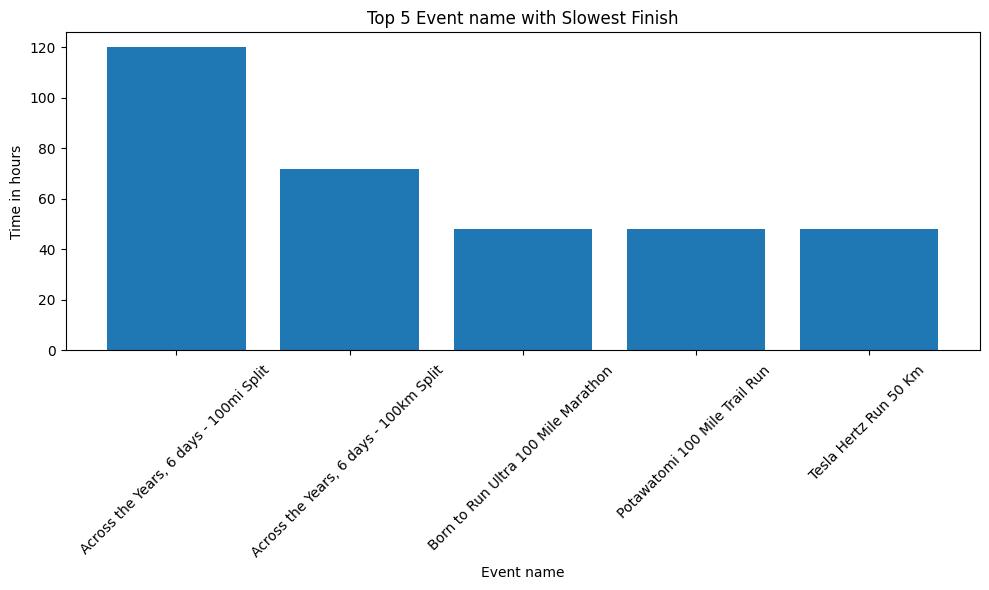

In [101]:
plt.figure(figsize=(10,6))
plt.bar(slowest_finish.head().index,slowest_finish.head()['max'])
plt.title('Top 5 Event name with Slowest Finish')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
final_df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
0,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 04:43:04,USA,M,M40,10.598,145423,43
1,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:04:11,JPN,M,M50,9.862,23412,51
2,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:23:03,USA,M,M50,9.286,3886,55
3,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:28:37,USA,F,W50,9.129,141,50
4,2019,2019-03-09,Wicked Root 50k - Saturday Run,50km,32,0 days 05:48:59,USA,M,M23,8.596,23417,30


**Does season has effect in Athlete performance**

In [104]:
final_df['season'] = final_df['Event dates'].dt.month.apply(lambda x : 'Winter' if x in [12,1,2] else
                                                            'Spring' if x in [3,4,5] else
                                                            'Summer' if x in [6,7,8] else
                                                            'Fall')

**Season wise particifation**

In [108]:
season_counts = final_df['season'].value_counts()

Text(0.5, 1.0, 'Season wise particifation')

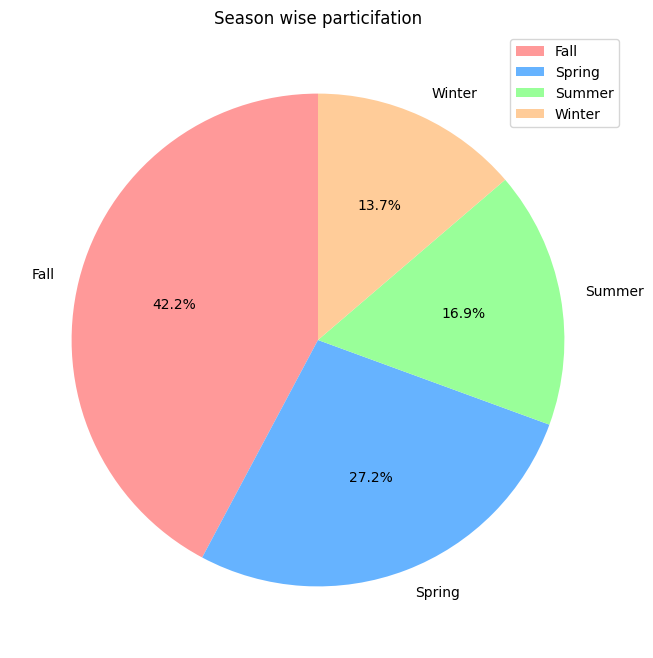

In [113]:
plt.figure(figsize=(8, 8))
plt.pie(season_counts,labels=season_counts.index,autopct='%1.1f%%',startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.legend()
plt.title('Season wise particifation')

**Comparing the average speed and participation of Athletes by season and gender**

In [121]:
Season_race = final_df.groupby(['season', 'Athlete gender']).agg(Athlete_gender_count =('Athlete gender', 'count'),
                                                                mean_speed =('Athlete average speed', 'mean'))
Season_race



Athlete_gender_count  mean_speed
season Athlete gender                                  
Fall   F                              11891    6.585815
       M                              25314    6.966590
Spring F                               7946    7.011098
       M                              16033    7.608158
Summer F                               5060    6.726207
       M                               9793    7.247473
Winter F                               3968    7.217129
       M                               8133    7.862677

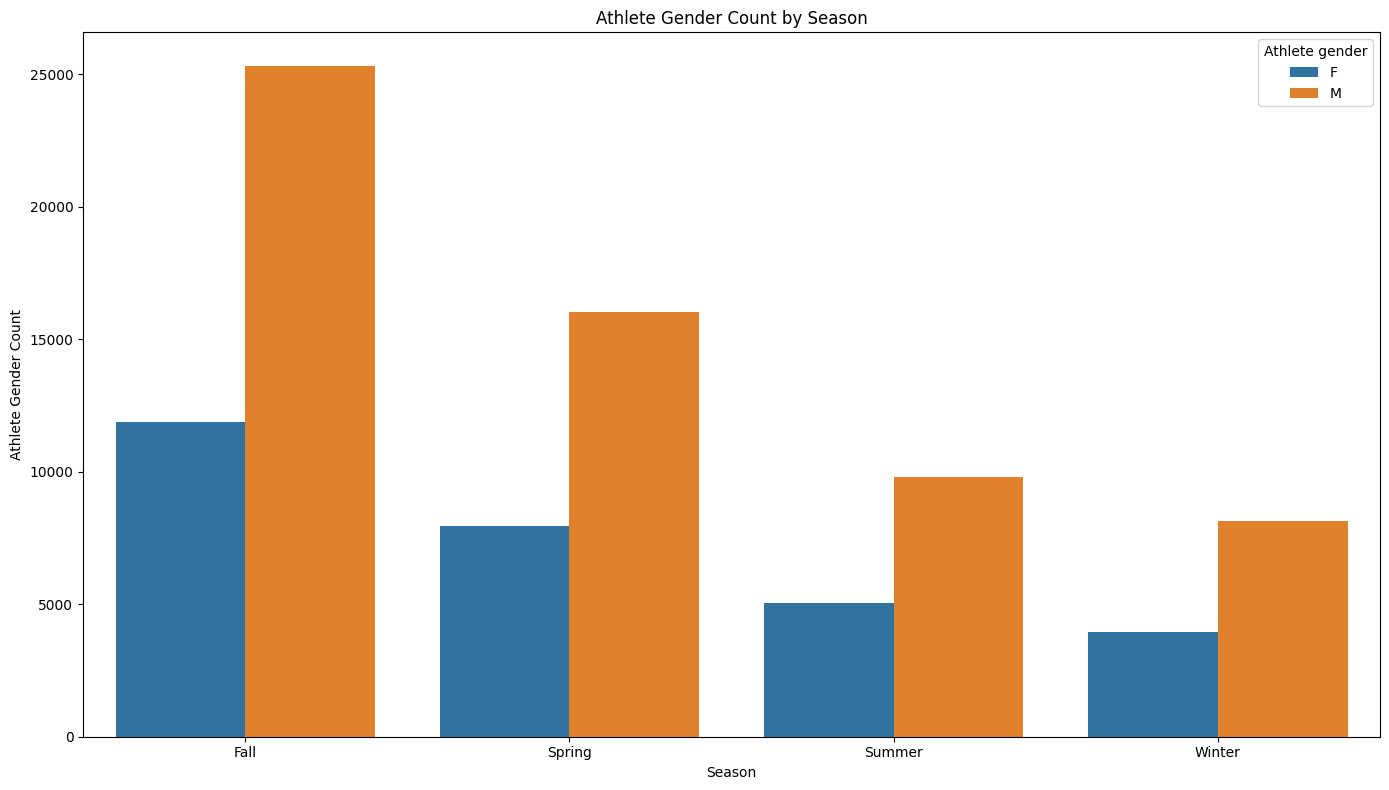

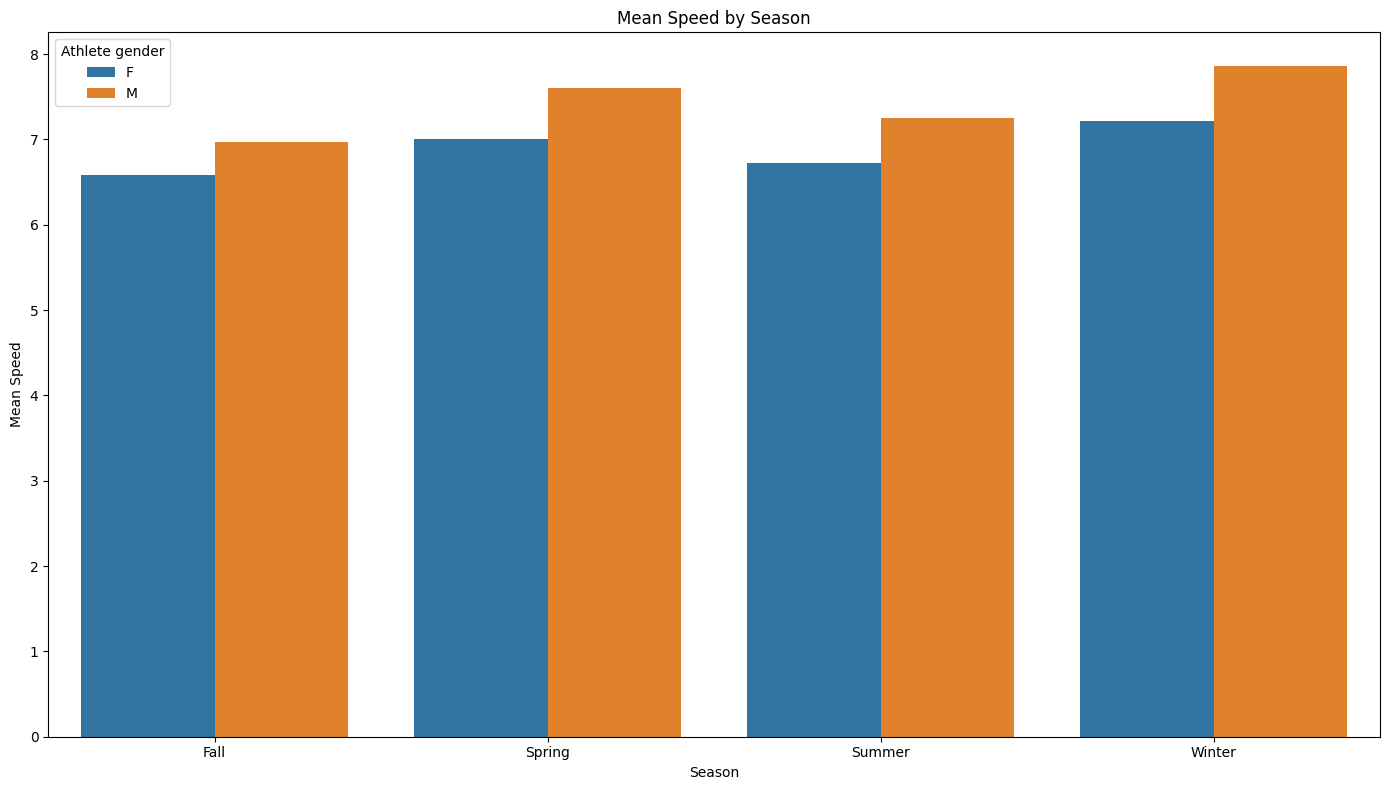

In [130]:
# Plot Athlete gender count
plt.figure(figsize=(14, 8))
sns.barplot(data=Season_race.reset_index(), x='season', y='Athlete_gender_count', hue='Athlete gender')
plt.title('Athlete Gender Count by Season')
plt.xlabel('Season')
plt.ylabel('Athlete Gender Count')
plt.tight_layout()
plt.show()

# Plot Mean Speed
plt.figure(figsize=(14, 8))
sns.barplot(data=Season_race.reset_index(), x='season', y='mean_speed', hue='Athlete gender')
plt.title('Mean Speed by Season')
plt.xlabel('Season')
plt.ylabel('Mean Speed')
plt.tight_layout()
plt.show()

**Effect of season on Athlete average speed**

In [148]:
season_speed = final_df.groupby('season').agg(mean_speed =('Athlete average speed', 'mean')).sort_values(by=['mean_speed'])
season_speed

,mean_speed
season,
Fall,6.844891
Summer,7.069893
Spring,7.410308
Winter,7.650997


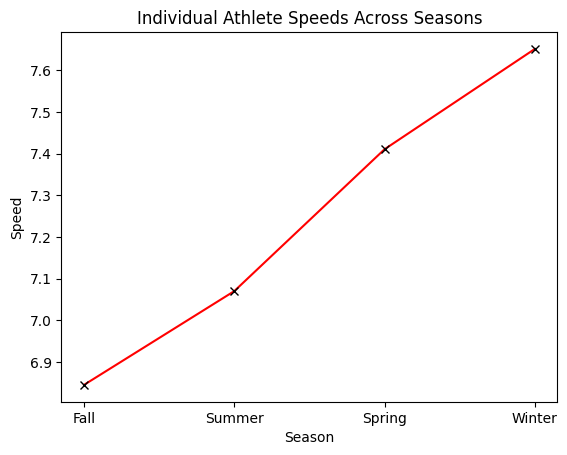

In [149]:
# sns.lineplot(data=Season_race.reset_index(), x='season', y='mean_speed')
plt.plot(season_speed.reset_index()['season'],season_speed.reset_index()['mean_speed'],marker='x',color='red',mec ='black')
plt.title('Individual Athlete Speeds Across Seasons')
plt.xlabel('Season')
plt.ylabel('Speed')
plt.show()